In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import math
from finta import TA as ta

In [3]:
start = '2021-01-01'       # Begin date for downloading stock data format: YYYY-MM-DD         
end = dt.datetime.now()    # today

In [4]:
# Create a list with all the stocks that trade in DOW 
stocks_list=['AAPL','CAT','KO','MRK','AXP','JNJ','MMM','IBM',
             'MSFT','CVX','CSCO','WMT','INTC','UNH','WBA','DOW',
             'NKE','BA','AMGN','CRM','PG','V'',VZ','DIS','HD','HON','TRV','MCD','JPM','GS']

In [5]:
stock_df = {}
stock_symbol='AAPL'

In [6]:
 df = yf.download(stock_symbol,start, end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200


In [25]:
df = yf.download(stock,start, end, interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.264984,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.850830,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.479851,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.761642,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.881638,105158200


In [8]:
# get data from finta for 
df=df.join(pd.DataFrame(ta.RSI(df),columns=None), how='outer')

In [9]:
df=df.rename(columns={"14 period RSI":"RSI_14_Day"})

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day
Date,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900,100.000000
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000,25.199812
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200,58.191200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200,62.811667


In [11]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [12]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,SMA_20,SMA_50
Date,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900,NaN,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900,100.000000,NaN,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000,25.199812,NaN,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200,58.191200,NaN,NaN
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200,62.811667,NaN,NaN


In [14]:
# Adding volume moving average column
Volume_MA = 10
#for i in Volume_MA:
df["Vol_Avg"]= df.iloc[:,5].rolling(window=Volume_MA).mean()

In [15]:
# Adding Moving average indicator
Volume_MAI = 0
#for i in Volume_MA:
df["Vol_Avg_Ind"]= df.iloc[:,5]/df.iloc[:,8]#.rolling(window=Volume_MA).mean()

In [16]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,SMA_20,SMA_50,Vol_Avg,Vol_Avg_Ind
Date,,,,,,,,,,,
2022-03-11,158.929993,159.279999,154.500000,154.729996,154.729996,96970100,36.235259,164.412001,168.637400,94000550.0,5.750213e+05
2022-03-14,151.449997,154.119995,150.100006,150.619995,150.619995,108732100,32.534970,163.511001,168.085800,95368100.0,6.468845e+05
2022-03-15,150.899994,155.570007,150.380005,155.089996,155.089996,92964300,39.742195,162.821500,167.636200,96317090.0,5.545598e+05
2022-03-16,157.050003,160.000000,154.460007,159.589996,159.589996,102300200,45.996781,162.161501,167.187800,98574630.0,6.118879e+05
2022-03-17,158.610001,161.000000,157.630005,160.619995,160.619995,75615400,47.344011,161.565000,166.806200,98468330.0,4.533129e+05
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123511700,51.586997,161.320000,166.587400,102445780.0,7.414228e+05
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,53.276412,161.224000,166.455000,102385040.0,5.755994e+05
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,57.226123,161.449000,166.388000,97423410.0,4.900113e+05
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,58.743731,161.956000,166.348400,98084190.0,5.895019e+05


In [18]:
#Export to csv
df.to_csv('AAPL.csv')

In [17]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i]):                          #line 9
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)                      #line 23
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Up trend
Buy at the price134.61134338378906
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Down trend
Sell at the price126.8499984741211
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Up trend
Buy at the price134.77999877929688
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up t

In [43]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2022-01-03 00:00:00 up to now with 1 trades:
SMAs used: [20, 50]
Total return over 1 trades: -8.9%


In [44]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 0
Average Loss: -8.899807086304879
Max Return: unknown
Max Loss: -8.899807086304879
Gain/loss ratio: -0.0


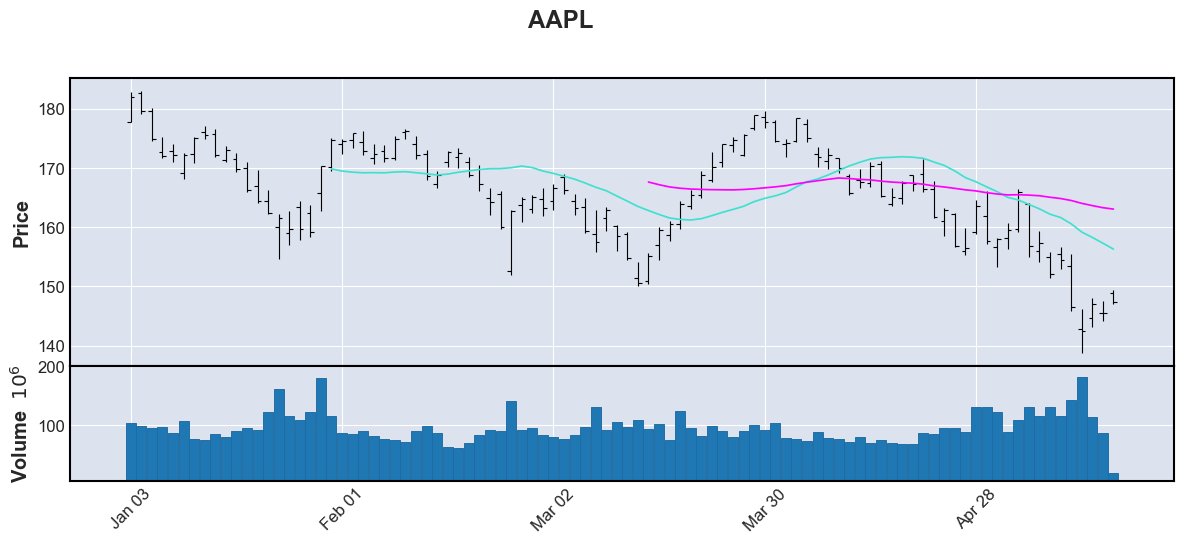

In [24]:
mpf.plot(df, type = 'ohlc',figratio=(16,6), 
         mav=(short_sma,long_sma), 
         volume=True, title= str(stock), 
         style='default')